In [2]:
import numpy as np
import pandas as pd
import gseapy as gp

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [4]:
# List of genes predicted for the models loaded as dataframe
df_XGB = pd.read_csv("XGB/gene_100.csv")
df_RotatE = pd.read_csv("RotatE/gene_100.csv")
df_LOFO = pd.read_csv("LocalOutlierFactor_TransE/gene_100.csv")
df_TOPO = pd.read_csv("Topology/gene_100.csv")
df_pos = pd.read_csv("IR_GeneID_names.csv", sep=",")

In [8]:
# select the best model for 10 iterations
genes_topo = df_TOPO["Topology_8"].to_list()
genes_roto = df_RotatE["model_6"].to_list()
genes_LOFO = df_LOFO["TransE_9"].to_list()
genes_XGB = df_XGB["RotatE_6"].to_list()
genes_pos = df_pos["Input ID"].to_list()

In [9]:
# perfrom enrichments
results_topo = gp.enrichr(gene_list=genes_topo, gene_sets="KEGG_2016", organism="Human")
results_roto = gp.enrichr(gene_list=genes_roto, gene_sets="KEGG_2016", organism="Human")
results_LOFO = gp.enrichr(gene_list=genes_LOFO, gene_sets="KEGG_2016", organism="Human")
results_XGB = gp.enrichr(gene_list=genes_XGB, gene_sets="KEGG_2016", organism="Human")
results_pos = gp.enrichr(gene_list=genes_pos, gene_sets="KEGG_2016", organism="Human")

In [10]:
# Extract the top enriched terms and their corresponding p-values for both gene lists
df_topo = results_topo.results
df_roto = results_roto.results
df_LOFO = results_LOFO.results
df_XGB = results_XGB.results
df_pos = results_pos.results

In [11]:
df_topo = (
    df_topo.sort_values("Adjusted P-value").head(10).iloc[::-1]
)  # reverse order for horizontal bar plot
df_roto = (
    df_roto.sort_values("Adjusted P-value").head(10).iloc[::-1]
)  # reverse order for horizontal bar plot
df_LOFO = (
    df_LOFO.sort_values("Adjusted P-value").head(10).iloc[::-1]
)  # reverse order for horizontal bar plot
df_XGB = (
    df_XGB.sort_values("Adjusted P-value").head(10).iloc[::-1]
)  # reverse order for horizontal bar plot
df_pos = (
    df_pos.sort_values("Adjusted P-value").head(10).iloc[::-1]
)  # reverse order for horizontal bar plot

In [12]:
dfs = [df_topo, df_roto, df_LOFO, df_XGB, df_pos]

In [13]:
# Extract the top 10 p-values for each dataframe
p_values = []
terms = []
for df in dfs:
    p_values.append(-1 * np.log10(df["Adjusted P-value"].tolist()))
    terms.append(df["Term"].to_list())

In [14]:
dictionaries = []
for df in dfs:
    dictionary = dict(zip(df["Term"], -1 * np.log10(df["Adjusted P-value"])))
    dictionaries.append(dictionary)

In [15]:
data = dictionaries

In [17]:
keys = sorted(
    list(
        set(
            list(data[0].keys())
            + list(data[1].keys())
            + list(data[2].keys())
            + list(data[3].keys())
            + list(data[4].keys())
        )
    )
)

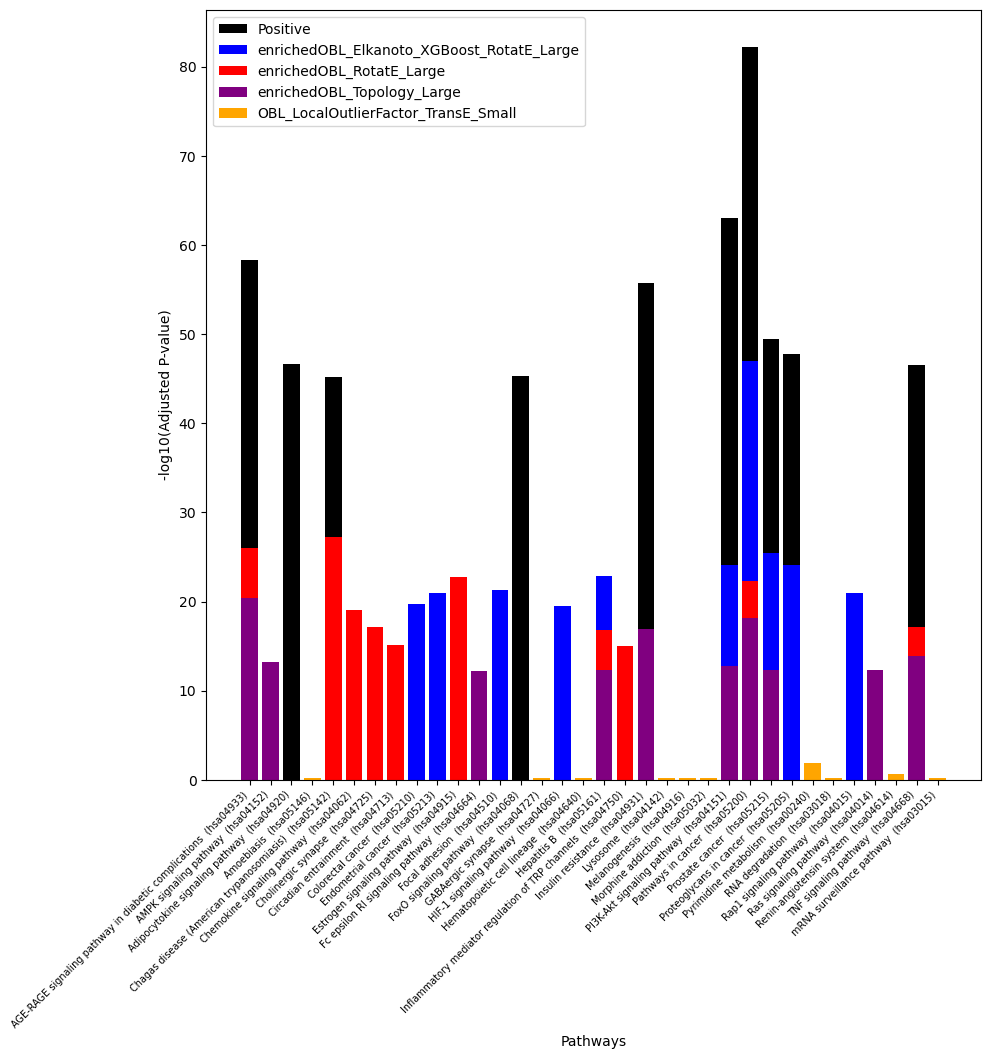

In [28]:
# Merge all the keys into a set to remove duplicates
keys_set = set().union(
    data[0].keys(), data[1].keys(), data[2].keys(), data[3].keys(), data[4].keys()
)

# Convert the set back to a sorted list
keys = sorted(list(keys_set))

# Get the values for each dictionary
values1 = [data[0].get(key, 0) for key in keys]
values2 = [data[1].get(key, 0) for key in keys]
values3 = [data[2].get(key, 0) for key in keys]
values4 = [data[3].get(key, 0) for key in keys]
values5 = [data[4].get(key, 0) for key in keys]


# Set the size of the figure
plt.figure(figsize=(10, 10))

lst = keys
for i in range(len(lst)):
    lst[i] = lst[i].replace("Homo sapiens", "").strip()
    lst[i] = lst[i].replace(" hsa", " (hsa", 1) + ")"


# Create the bar charts for each dictionary

plt.bar(lst, values5, color="black")
plt.bar(lst, values1, color="blue")
plt.bar(lst, values2, color="red")
plt.bar(lst, values4, color="purple")
plt.bar(lst, values3, color="orange")


# Set the title and labels for the chart
plt.xlabel("Pathways")
plt.ylabel("-log10(Adjusted P-value)")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha="right", size=7)
plt.legend(
    [
        "Positive",
        "enrichedOBL_Elkanoto_XGBoost_RotatE_Large",
        "enrichedOBL_RotatE_Large",
        "enrichedOBL_Topology_Large",
        "OBL_LocalOutlierFactor_TransE_Small",
    ]
)

plt.savefig("KEGG_enrcihment.jpg", bbox_inches="tight", dpi=600)
# Show the chart
plt.show()